<a href="https://colab.research.google.com/github/JayV1I/Aulas-pucc/blob/main/caminhao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4
4
5


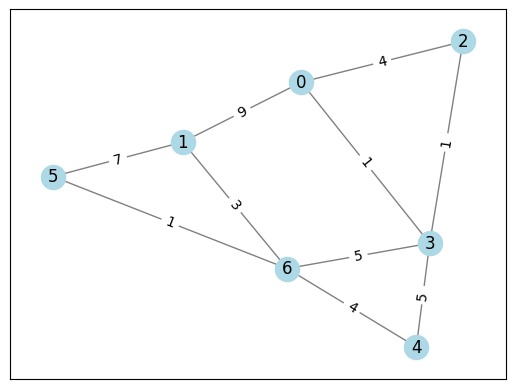

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)

        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1

def maximum_weight_path(n, edges, queries):
    # Sort edges by weight in descending order
    edges.sort(key=lambda x: -x[2])

    # Initialize Union-Find
    uf = UnionFind(n)

    # Build the MST using Kruskal's algorithm
    mst = {i: [] for i in range(n)}
    for u, v, w in edges:
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            mst[u].append((v, w))
            mst[v].append((u, w))

    # Function to find the maximum weight path using DFS
    def find_max_weight_path(start, end):
        stack = [(start, float('inf'))]
        visited = [False] * n
        visited[start] = True

        while stack:
            node, min_weight = stack.pop()
            if node == end:
                return min_weight

            for neighbor, weight in mst[node]:
                if not visited[neighbor]:
                    visited[neighbor] = True
                    stack.append((neighbor, min(min_weight, weight)))

        return 0

    results = []
    for start, end in queries:
        results.append(find_max_weight_path(start, end))

    return results

def print_graph(n, edges):
    G = nx.Graph()
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

data = """7 10 3
1 2 9
1 3 4
1 4 1
2 6 7
2 7 3
3 4 1
4 5 5
4 7 5
5 7 4
6 7 1
1 3
3 2
5 4"""

data = data.split()
idx = 0

N = int(data[idx])
M = int(data[idx + 1])
S = int(data[idx + 2])
idx += 3

edges = []
for _ in range(M):
    A = int(data[idx]) - 1
    B = int(data[idx + 1]) - 1
    P = int(data[idx + 2])
    edges.append((A, B, P))
    idx += 3

queries = []
for _ in range(S):
    A = int(data[idx]) - 1
    B = int(data[idx + 1]) - 1
    queries.append((A, B))
    idx += 2

results = maximum_weight_path(N, edges, queries)

for result in results:
    print(result)

print_graph(N, edges)

